In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# load the data
Sales_df= pd.read_csv('DATA/amazon_sales_data 2025.csv')
Sales_df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [6]:
# explore the structure of the data
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [ ]:
#check for mssing values
Sales_df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

# Task 2 : Basic Data Analysis

In [8]:
# Statistics of the data
Sales_df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [16]:
# group by 'Order Date' and 'Product Name' and sum the 'Sales'
Sales_by_date = Sales_df.groupby(['Date', 'Product'])['Total Sales']

#mean sales per date
Sales_by_date.mean().head(5)

Date      Product     
01-03-25  Headphones       200.0
          Laptop          1600.0
01-04-25  Smartwatch       300.0
          T-Shirt           20.0
02-02-25  Refrigerator    3600.0
Name: Total Sales, dtype: float64

In [22]:
# groupby sales by product and sum the 'Sales'
Sales_by_product = Sales_df.groupby(['Order ID','Product'])['Total Sales']
Sales_by_product.head(5)


0       180
1       400
2       120
3       180
4       450
       ... 
245      40
246      40
247      40
248     450
249    2000
Name: Total Sales, Length: 250, dtype: int64

# DATA VISUALIZATION


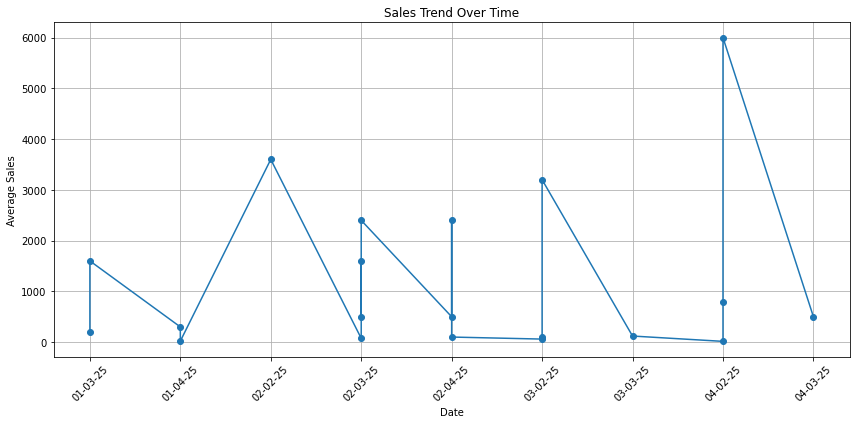

In [38]:
# A LINE GRAPD SHOWING THE SALES TREND OVER TIME
plt.figure(figsize=(12, 6))
plt.plot(Sales_by_date.mean().head(20).index.get_level_values(0), Sales_by_date.mean().head(20), marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

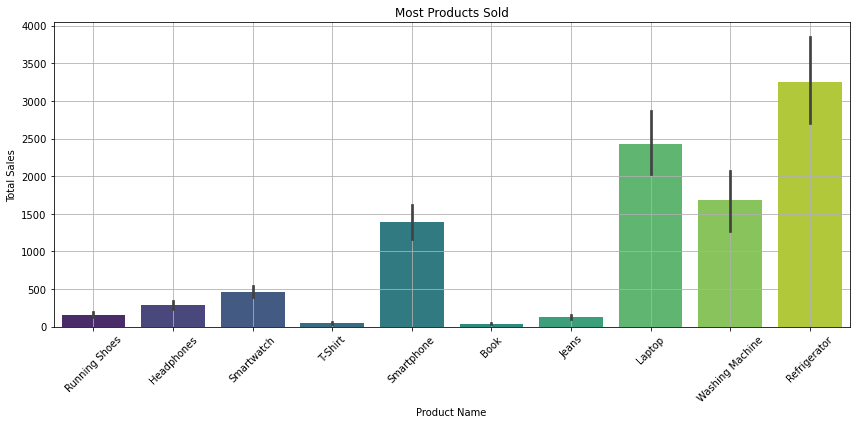

In [45]:
# A BAR CHART SHOWING MOST PRODUCTS SOLD
plt.figure(figsize=(12, 6))
sns.barplot(x=Sales_by_product.sum().index.get_level_values(1), y=Sales_by_product.sum(), palette='viridis')
plt.title('Most Products Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


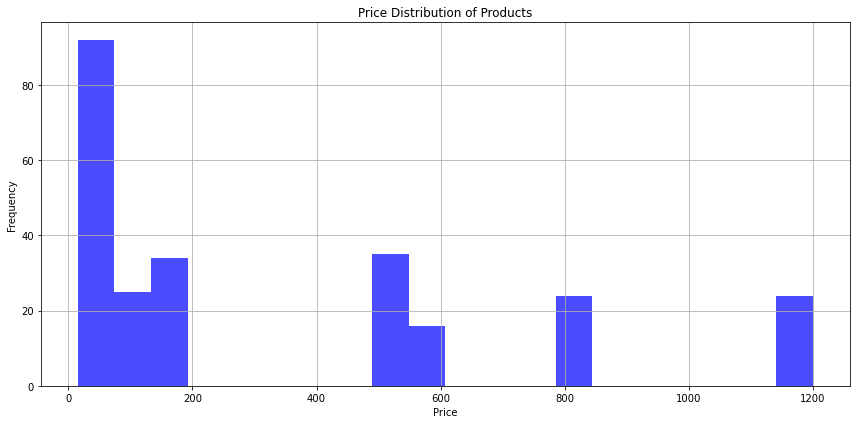

In [41]:
# A HISTOGRAM SHOWING THE PRICE DISTRIBUTION OF PRODUCTS
plt.figure(figsize=(12, 6))
plt.hist(Sales_df['Price'], bins=20, color='blue', alpha=0.7)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()


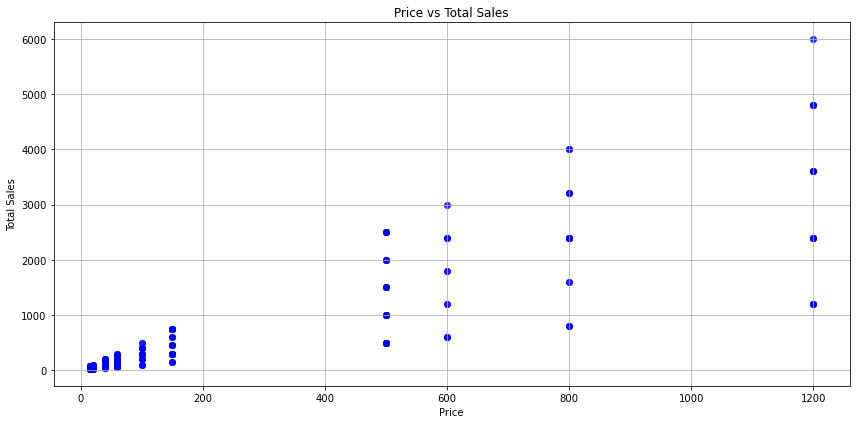

In [35]:
# A SCATTER PLOT SHOWING THE RELATIONSHIP BETWEEN PRICE AND SALES
plt.figure(figsize=(12, 6))
plt.scatter(Sales_df['Price'], Sales_df['Total Sales'], alpha=0.5, color='BLUE')
plt.title('Price vs Total Sales')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.grid()
plt.tight_layout()
plt.show()